<a href="https://colab.research.google.com/github/Aldrik-Alvaro/Algoritimo-K-Means/blob/main/kmeans_clustering_Aldrik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Pacotes

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=FutureWarning)

Carregando dataset


In [25]:
# Lendo dados sobre penguis
url = 'https://raw.githubusercontent.com/Aldrik-Alvaro/Algoritimo-K-Means/main/datasets/penguins.csv'
penguins_df = pd.read_csv(url, sep = ',')
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [26]:

# Removendo linhas com valores ausentes (NaN) do DataFrame
penguins_df = penguins_df.dropna()

# Criando um novo DataFrame removendo as linhas com índices 9 e 14
penguins_clean = penguins_df.drop([9, 14])

penguins_clean.rename(columns={
    'culmen_length_mm': 'comprimento_bico_mm',
    'culmen_depth_mm': 'profundidade_bico_mm',
    'flipper_length_mm': 'comprimento_nadadeira_mm',
    'body_mass_g': 'massa_corporal_g',
    'sex': 'sexo'
}, inplace=True)

df = penguins_clean
df.head()

,comprimento_bico_mm,profundidade_bico_mm,comprimento_nadadeira_mm,massa_corporal_g,sexo
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [27]:
# One-Hot Encoding da coluna 'sexo'
df = pd.concat([df, pd.get_dummies(df['sexo'])], axis=1)
df.drop(['sexo'], axis=1, inplace=True)
print("\nDados após One-Hot Encoding:")
print(df)


Dados após One-Hot Encoding:
     comprimento_bico_mm  profundidade_bico_mm  comprimento_nadadeira_mm  \
0                   39.1                  18.7                     181.0   
1                   39.5                  17.4                     186.0   
2                   40.3                  18.0                     195.0   
4                   36.7                  19.3                     193.0   
5                   39.3                  20.6                     190.0   
..                   ...                   ...                       ...   
338                 47.2                  13.7                     214.0   
340                 46.8                  14.3                     215.0   
341                 50.4                  15.7                     222.0   
342                 45.2                  14.8                     212.0   
343                 49.9                  16.1                     213.0   

     massa_corporal_g      .  FEMALE   MALE  
0          

In [28]:
# Normalizando
df_normalized = df.copy()
for column in df_normalized.columns:
    df_normalized[column] = (df_normalized[column] - df_normalized[column].mean()) / df_normalized[column].std()

print("\nDados normalizados:")
print(df_normalized)


Dados normalizados:
     comprimento_bico_mm  profundidade_bico_mm  comprimento_nadadeira_mm  \
0              -0.904160              0.791934                 -1.425979   
1              -0.830688              0.128310                 -1.069912   
2              -0.683746              0.434598                 -0.428991   
4              -1.344987              1.098222                 -0.571418   
5              -0.867424              1.761846                 -0.785058   
..                   ...                   ...                       ...   
338             0.583633             -1.760467                  0.924063   
340             0.510162             -1.454179                  0.995277   
341             1.171403             -0.739506                  1.493771   
342             0.216277             -1.198939                  0.781637   
343             1.079564             -0.535314                  0.852850   

     massa_corporal_g       .    FEMALE      MALE  
0           -0

In [29]:
# Clustering K-Means
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(df_normalized)
clusters = kmeans_model.predict(df_normalized)
df_normalized['group'] = clusters
print("\nDados com grupos K-Means:")
print(df_normalized)


Dados com grupos K-Means:
     comprimento_bico_mm  profundidade_bico_mm  comprimento_nadadeira_mm  \
0              -0.904160              0.791934                 -1.425979   
1              -0.830688              0.128310                 -1.069912   
2              -0.683746              0.434598                 -0.428991   
4              -1.344987              1.098222                 -0.571418   
5              -0.867424              1.761846                 -0.785058   
..                   ...                   ...                       ...   
338             0.583633             -1.760467                  0.924063   
340             0.510162             -1.454179                  0.995277   
341             1.171403             -0.739506                  1.493771   
342             0.216277             -1.198939                  0.781637   
343             1.079564             -0.535314                  0.852850   

     massa_corporal_g       .    FEMALE      MALE  group  
0

In [30]:
# PCA para redução de dimensionalidade
pca = PCA(n_components=2, random_state=42)
pca_array = pca.fit_transform(df_normalized.drop('group', axis=1))

In [31]:
# Converter para DataFrame
df_pca = pd.DataFrame(data=pca_array, index=df_normalized.index.copy())
df_pca.columns = ['PC1', 'PC2']
df_pca['group'] = clusters

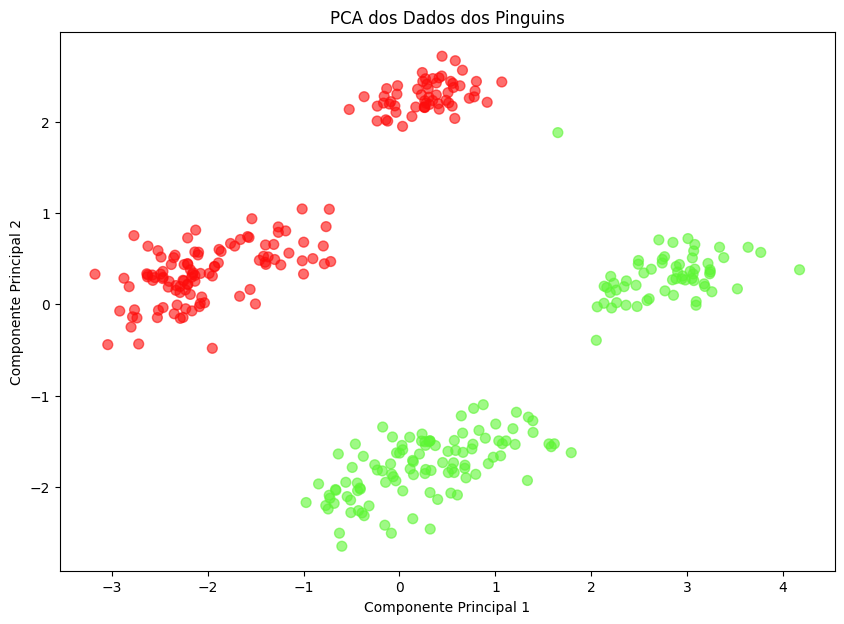

In [32]:
# Plotando
colors = ['#5DF534', '#FD0D0C']
df_pca['color'] = df_pca['group'].map(lambda x: colors[x])

plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha=0.6, s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados dos Pinguins')
plt.show()

In [33]:
# PCA com 3 componentes
pca = PCA(n_components=3, random_state=42)
pca_array = pca.fit_transform(df_normalized.drop('group', axis=1))

# Converte para DataFrame
df_pca = pd.DataFrame(data=pca_array, index=df_normalized.index.copy())
df_pca.columns = ['PC1', 'PC2', 'PC3']
df_pca['group'] = clusters

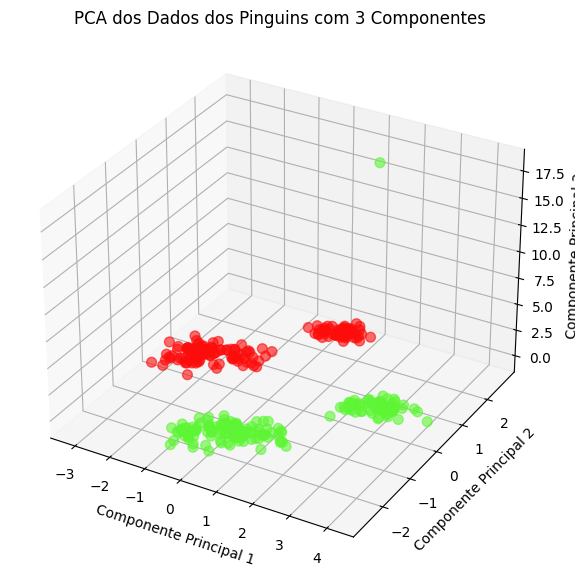

In [34]:

# Importando biblioteca para gráficos 3D
from mpl_toolkits.mplot3d import Axes3D

# Mapeamento de cores
colors = ['#5DF534', '#FD0D0C']
df_pca['color'] = df_pca['group'].map(lambda x: colors[x])

# Criando a figura
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotando
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['color'], alpha=0.6, s=50)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('PCA dos Dados dos Pinguins com 3 Componentes')

# Mostrando o gráfico
plt.show()